<a href="https://colab.research.google.com/github/jojogelato/clicked_ads/blob/main/Predict_Customer_Clicked_Ads_Classification_by_Using_Machine_Learning_ADR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-learn

In [ ]:
!pip install -U ppscore

# Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from datetime import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

import ppscore as pps

from warnings import filterwarnings
filterwarnings('ignore')

#rcParams['figure.figsize'] = 10,10
#pd.set_option('display.max_columns', None)

## Import Dataset

In [ ]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


#Data Preparation

In [ ]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace = True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## Statistic Descriptive

In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
df.select_dtypes('object').describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


#Create Function

In [ ]:
def extract_day_of_week(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').weekday()

def extract_day_of_month(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').day

def extract_month(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').month

In [ ]:
def experiment(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf)
                 ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['duration'].append(duration)
        
    return result

# EDA

## Target (Clicked on Ads) Distribution

In [ ]:
coa = df['Clicked on Ad'].value_counts()
coa

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

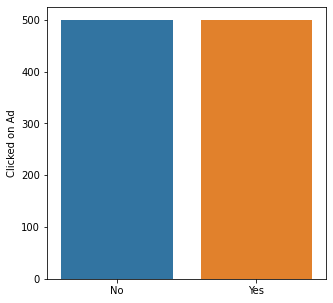

In [ ]:
plt.figure(figsize = (5,5))
sns.barplot(x = coa.index, y = coa)
plt.show()

Target mempunyai distribusi yang balance (seimang) sehingga tidak perlu melakukan preprocessing untuk imbalanced class

## Daily Internet Usage

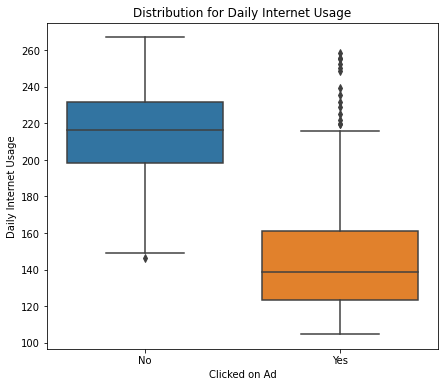

In [ ]:
plt.figure(figsize=(7,6))

sns.boxplot(x=df['Clicked on Ad'],y=df['Daily Internet Usage'])

plt.title('Distribution for Daily Internet Usage')

plt.show()

Terlihat hal menarik pada distribusi tersebut. 
Bahwa potensi user dalam clicked ads suatu product lebih tinggi pada user yang jarang ber internet. 
Hal ini dapat mengindikasikan bahwa user yang jarang ber internet cenderung lebih memperhatikan ads nya

## Daily Time Spent on Site

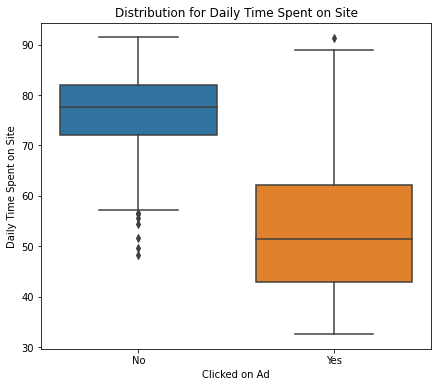

In [ ]:
plt.figure(figsize=(7,6))

sns.boxplot(x=df['Clicked on Ad'],y=df['Daily Time Spent on Site'])

plt.title('Distribution for Daily Time Spent on Site')

plt.show()

Data Daily internet usage memiliki distribusi yang cukup unik, sehingga dilakukan anlisa lebih lanjut dengan menampilkan behavior seseorang ketika berada dalam sebuah website. 
Dari EDA di atas, ternyata lama penggunaan internet (daily internt usage) dan lamanya user di dalam sebuah website memiliki distrbusi yang mirip. Yaitu potensial user lebih banyak ditemukan pada user yang hanya sebentar di dalam website

## Age

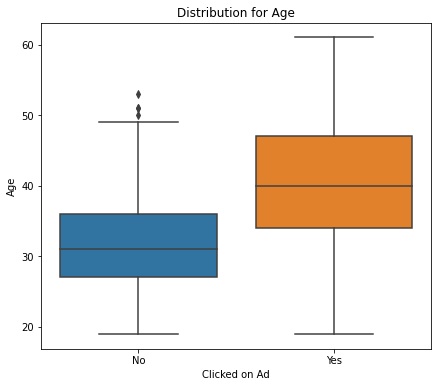

In [ ]:
plt.figure(figsize=(7,6))

sns.boxplot(x=df['Clicked on Ad'],y=df['Age'])

plt.title('Distribution for Age')

plt.show()

Dari hasil visualisasi di atas, ternyata market potensial justru terdapat pada orang tua (rentang usia 35-45 tahun). Mungkin karena anak muda lebih selektif dalam menggunakan internet. 

## Bivariate Analysis

### Internet Usage vs Time Spent on Site

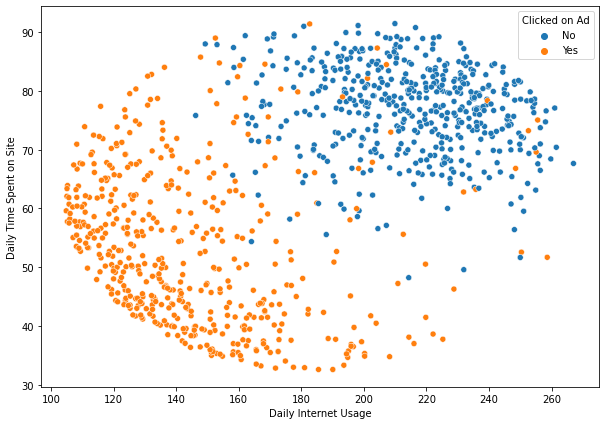

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Daily Internet Usage'],y=df['Daily Time Spent on Site'],hue=df['Clicked on Ad'])

plt.show()

untuk mengetahui lebih lanjut terkait feature apa saja yang bisa digunakan, maka dilakukan visualisasi antara internet usage dan time spent on site terhadap jumlah clicked on ads nya. 

dari scatterplot di atas, kita dapat mebagi user menjadi 2 kategori yaitu active user (warna biru) dan non active user (warna orange)

Grafik di atas menunjukkan bahwa active user cenderung tidak meng klik sebuah iklan ketika ber internet dibandingkan non active user. 
Sehingga, dalam model kali ini, kita bisa mengoptimalkan sistem advertisement terhadap user yang tidak aktif ber internet

## Multivariate analysis

## Heatmap correlation plot

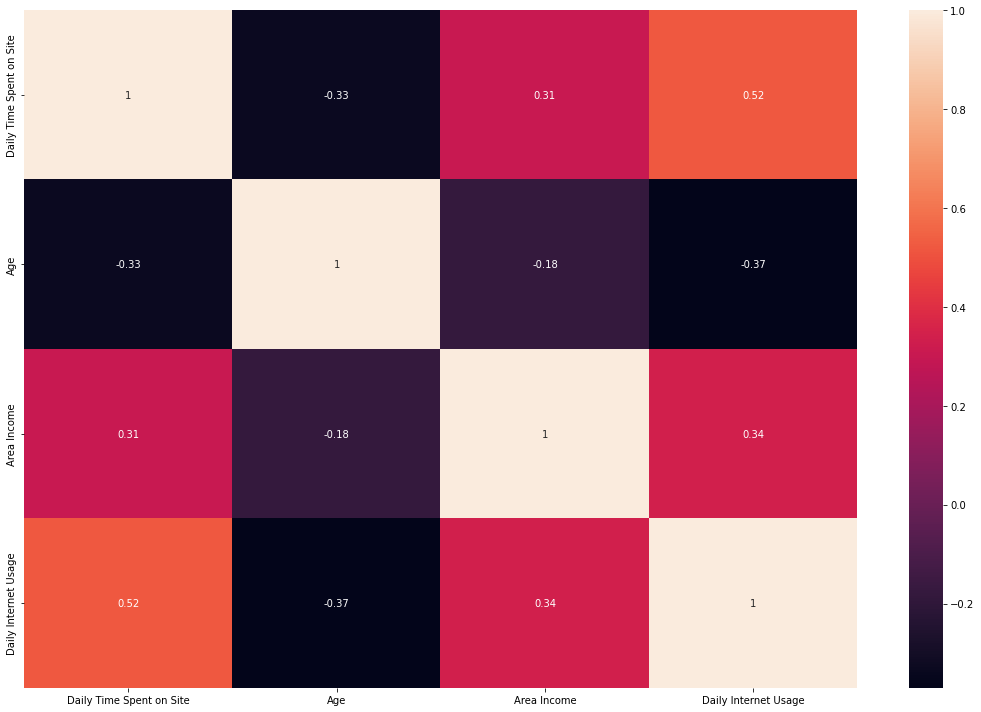

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

Dar heatmap di atas, kita tidak dapat menemukan korelasi antara target dan feature yang ada, sehingga dilakukan viualisasi menggunakan ppscore

## Predictive Power Score (PPScore) correlation plot

In [ ]:
df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

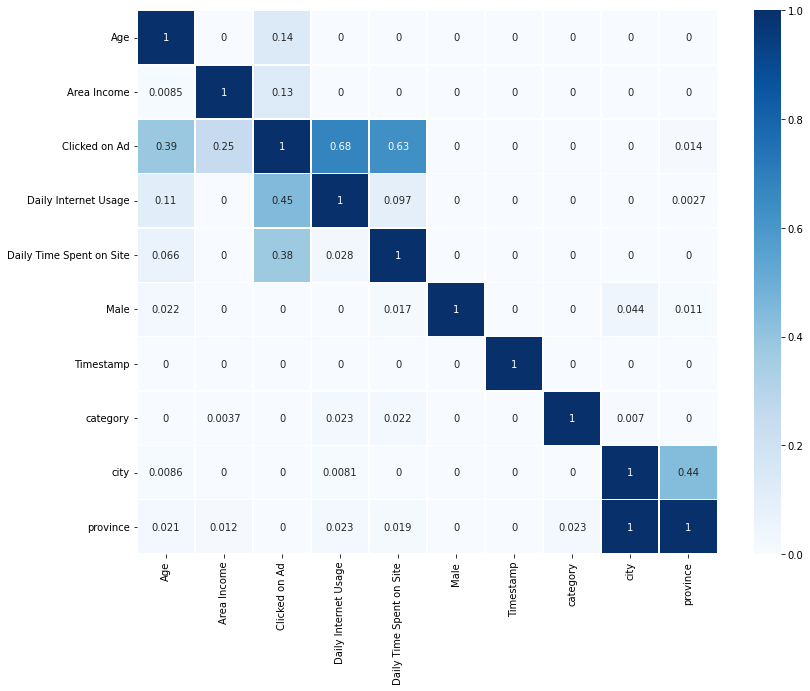

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

PP score bekerja dengan memprediksi score korelasi terhadap kolom target dari sebuah feature. 

Untuk feature Clicked on Ad yang menjadi target kita, berhubungan dengan:
1. Daily Time Spent on Site
2. Daily Internet Usage
3. Area Income
4. Age

Hasil dari ppscore ini bisa menjadi panduan kita untuk modelling


# Data Preprocessing

##Feature Engineering

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.rename(columns = {'Male' : 'Gender'}, inplace = True)
df['Clicked on Ad'] = np.where(df['Clicked on Ad'] == 'Yes', 1, 0)
df['Gender'] = np.where(df['Gender'] == 'Laki-Laki', 1,0)

In [ ]:
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['week'] = df['Timestamp'].dt.week

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,year,month,day,week
0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,27,12
1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,Food,2016,4,4,14
2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,Electronic,2016,3,13,10
3,74.15,29,383643260.0,245.89,1,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,House,2016,1,10,1
4,68.37,35,517229930.0,225.58,0,2016-06-03 03:36:00,0,Medan,Sumatra Utara,Finance,2016,6,3,22


In [ ]:
df.drop(columns=['Timestamp'], inplace = True)

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,city,province,category,year,month,day,week
0,68.95,35,432837300.0,256.09,0,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,27,12
1,80.23,31,479092950.0,193.77,1,0,Denpasar,Bali,Food,2016,4,4,14
2,69.47,26,418501580.0,236.50,0,0,Surabaya,Jawa Timur,Electronic,2016,3,13,10
3,74.15,29,383643260.0,245.89,1,0,Batam,Kepulauan Riau,House,2016,1,10,1
4,68.37,35,517229930.0,225.58,0,0,Medan,Sumatra Utara,Finance,2016,6,3,22


In [ ]:
df_group = df.groupby(['week','month']).agg({'Clicked on Ad' : ['sum', 'count']}).reset_index()
df_group.columns = ['week', 'month', 'click','impression']
df_group['CTR %'] = (df_group['click'] / df_group['impression']) *100
df_group.head()

,week,month,click,impression,CTR %
0,1,1,20,40,50.000000
1,2,1,15,32,46.875000
2,3,1,12,23,52.173913
3,4,1,15,33,45.454545
4,5,2,19,31,61.290323


In [ ]:
df_group_city = df.groupby(['city']).agg({'Clicked on Ad' : ['sum']}).reset_index()
df_group_city.columns = ['city', 'jumlah']
df_group_city

,city,jumlah
0,Balikpapan,5
1,Bandar Lampung,14
2,Bandung,37
3,Banjarmasin,14
4,Batam,17
5,Bekasi,31
6,Bogor,15
7,Cimahi,13
8,Denpasar,9
9,Depok,13


## Handle Missing Value

In [ ]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       0
Clicked on Ad                0
city                         0
province                     0
category                     0
year                         0
month                        0
day                          0
week                         0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      0
Clicked on Ad               0
city                        0
province                    0
category                    0
year                        0
month                       0
day                         0
week                        0
dtype: int64

## Handle Duplicated Data

In [ ]:
df.duplicated().sum()

0

##Split Target and Features

In [ ]:
df.drop(columns=['city','province','category', 'year'], inplace=True)

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,month,day,week
0,68.95,35,432837300.0,256.09,0,0,3,27,12
1,80.23,31,479092950.0,193.77,1,0,4,4,14
2,69.47,26,418501580.0,236.50,0,0,3,13,10
3,74.15,29,383643260.0,245.89,1,0,1,10,1
4,68.37,35,517229930.0,225.58,0,0,6,3,22


In [ ]:
X = df.drop(labels=['Clicked on Ad'],axis=1)
y = df['Clicked on Ad']

## Get dummies for all categorical features

In [ ]:
X_dummy = pd.get_dummies(X)

#Modelling

## Split Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
print('Dimensi Train: ', X_train.shape)
print('Dimensi Test: ', X_test.shape)

Dimensi Train:  (772, 8)
Dimensi Test:  (193, 8)


## Experiment 1 : Without standard scaller

In [ ]:
from collections import defaultdict
result = experiment(X_train, X_test, y_train, y_test)
result = pd.DataFrame(result)

In [ ]:
result

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.647668,0.638298,0.638298,0.006882
1,Logistic Regression,LogisticRegression(),0.512953,0.000000,0.000000,0.010906
2,Decision Tree,DecisionTreeClassifier(),0.963731,0.968085,0.957895,0.004474
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.963731,0.978723,0.948454,0.194778


Berdasarkan hasil modelling menggunakan data preprocessing sederhana. dapat dilihat bahwa algoritma Decision Tree dan Random Forest memiliki akurasi terbesar, sementara K-nearest neighbour dan logistic regression tidak terlalu bagus

## Experiment 2: WIt standard scaller

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [ ]:
result2 = experiment(X_train_ss, X_test_ss, y_train, y_test)
result2 = pd.DataFrame(result2)

In [ ]:
result2

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.953368,0.936170,0.967033,0.002268
1,Logistic Regression,LogisticRegression(),0.979275,0.978723,0.978723,0.004367
2,Decision Tree,DecisionTreeClassifier(),0.953368,0.968085,0.938144,0.003192
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.963731,0.978723,0.948454,0.221899


Berdasarkan hasil modelling menggunakan standard scaller, kita mendapatkan peningkatan hasil yang signifikan terutama untuk algoritma K-nearest neighbor dan logistic regression. 
Bahkan, logistic regression menjadi model paling tinggi tingkat akurasinya, sehingga dipilih menjadi model terbaik

## Evaluation

In [ ]:
final_model = result2['model'][1]
y_pred = final_model.predict(X_test_ss)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[97,  2],
       [ 2, 92]])

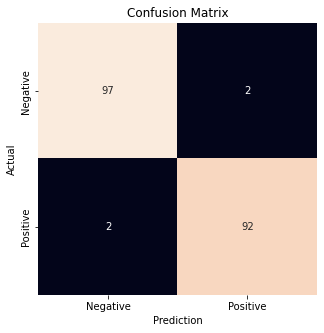

In [ ]:
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot = True, cbar = False)

plt.xlabel('Prediction')
plt.xticks(np.arange(2) + 0.5, ["Negative","Positive"])

plt.ylabel('Actual')
plt.yticks(np.arange(2) + 0.5, ["Negative","Positive"])

plt.title ('Confusion Matrix')

plt.show()

Evaluasi model dilakukan untuk melihat bagaimana performa model secara lebih detai. evaluasi dilakukan dengan confusion matrix

dari hasil confusion matrix, model logistic regression sangat baik. dapat dilihat kesalahan prediksi (warna hitam) sangat sedikit.

dengan hasil demikian, maka kita akan mendapatkan akurasi, precision, dan recall yang bagus

### Feature Importance

In [ ]:
from xgboost import XGBClassifier
features=pd.get_dummies(df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Gender', 'month','day', 'week']],drop_first=True)

model=XGBClassifier()
 
model.fit(features,df['Clicked on Ad'])
 
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
print(feature_importances.sort_values('feature_importance',ascending=False))

                   features  feature_importance
3      Daily Internet Usage            0.626954
0  Daily Time Spent on Site            0.165773
2               Area Income            0.063094
1                       Age            0.056161
7                      week            0.027992
5                     month            0.024782
6                       day            0.020990
4                    Gender            0.014253


In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Dengan menggunakan model logistic regression, kita mampu melihat feature yang paling penting dalam membangun model. 

Dalam algoritma logistic regression, dapat kita lihat bahwa daily internet usage merupakan feature yang sangat penting dalam menentukan apakah user akan click ads atau tidak. Feature penting lain adalah daily time spent on site, umur dan income suatu area


#Business Recommendation

Berdasarkan EDA dan feature importance, dapat kita tarik kesimpulan bahwa:



1.   Dataset kita memiliki 2 segment user yaitu active dan non active user.
*   Active user memiliki kriteria sering berinternet, sering mengunjungi wesite, berumur relatif muda
*   Non active user memiliki sifat sebaliknya


2.   Non active user cenderung lebih mudah tertarik click ads
3.   User yang memiliki waktu lebih lama berselancar internet merupakan yang paling sulit diberikan iklan, bisa jadi karena telah terbiasa
4.   User orang tua bisa menjadi target digital ads selanjutnya







## Simulation

Dengan menggunakan model machine learning yang telah dibuat, kita dapat membuat simulasi dengan asumsi sebagai berikut:


*   Tarif iklan sebesar 25rb rupiah sekali tayang
*   Setiap user yang convert, kita akan mendapat keuntungan sebesar 60rb rupiah



In [ ]:
#Ukuran test data
X_test.shape

(193, 8)

In [ ]:
#Jumlah kelas pada setiap data
jum_class = pd.Series(y_test).value_counts()
jum_class

0    99
1    94
Name: Clicked on Ad, dtype: int64

**Simulasi:**

1. Tanpa ML model


*   Permisalan budget iklan adalah 198*50rb rupiah = 9,9juta rupiah
*   Karena hanya ada 94 yang convert maka pendapatan kita sebesar 94*60rb rupiah = 5,6 juta rupiah
*   Loss = 5.6jt - 9.9 = -4.3jt rupiah

Berdasarkan simulasi di atas, jika tidak menggunakan ML modelling, maka kit akan mendapatkan potential loss sebesar 4.3jt rupiah




2. Dengan menggunakan ML modelling
   

*   Kita akan melakukan advertisement hanya pada user yang pontetial
*   Cost budget 94*50 ribu rupiah = 4.7 juta

*  Karena ada 92 user yang convert maka potensi pendapatan kita sebesar 92*60rb rupiah = 5.5jt rupiah
* Profit = 5.5jt - 4.7jt = 800rb rupiah




3. Kesimpulan nya adalah dengan ML dapat membantu kita mengoptimalkan penggunaan cost dan meningkatkan revenue